## using titanic class

## the link for the data

## 'Let's Build Classifiers - Decision Tree, Random Forest and Gradient Boosting'


## https://www.youtube.com/watch?v=uTRdOWnGOKQ

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns


In [7]:
data= pd.read_csv('titanic.csv')

# EDA AND DATA CLEANING

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 69.5+ KB


# drop the unecessary column

In [11]:
data.drop(columns=['Ticket','Cabin','Name'],inplace=True)

In [16]:
data.drop(columns='Unnamed: 0',inplace =True)

In [18]:
data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


## check the null value

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [25]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

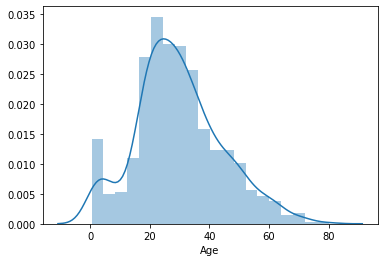

In [26]:
sns.distplot(data['Age'])

## heat map for the null value

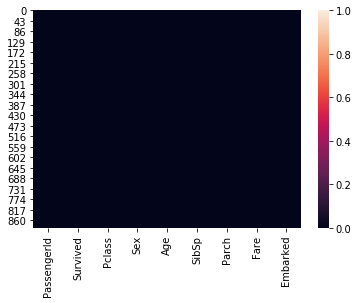

In [38]:
sns.heatmap(data.isnull())

In [33]:
data['Age']=data['Age'].fillna(data['Age'].mean()).isnull().sum()

In [35]:
data['Embarked']=data['Embarked'].dropna()

In [40]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode())

In [49]:
data= data.dropna()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 69.5+ KB


In [54]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

## get the dummies

In [60]:
test=pd.get_dummies(data[['Embarked','Sex']])

## concat the data

In [ ]:
pd.concatt(test,data)

## the test data

In [113]:
test.head(
)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1


In [69]:
data.drop(columns=['Sex','Embarked'],inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    int64  
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked_C   889 non-null    uint8  
 8   Embarked_Q   889 non-null    uint8  
 9   Embarked_S   889 non-null    uint8  
 10  Sex_female   889 non-null    uint8  
 11  Sex_male     889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 59.9 KB


In [71]:
from sklearn.model_selection import train_test_split

## splitting the data

## split for the X(variable) and the y(target) 

In [72]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')

In [77]:
x=data.drop(columns=['Survived','PassengerId'])
y=data['Survived']

In [82]:
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.3,random_state=0)

## classifier that will be used

## 1.decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt_model=DecisionTreeClassifier(criterion='gini',random_state=20)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

In [95]:
dt_predicted= dt_model.predict(X_test)
dt_predicted.shape

(623,)

In [89]:
from sklearn import metrics

In [96]:
metrics.accuracy_score(y_test,dt_predicted)

0.7784911717495987

## 2. random forst

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
rf_predicted= rf_model.predict(X_test)

In [107]:
metrics.accuracy_score(y_test,rf_predicted)

0.7800963081861958

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test,rf_predicted)

array([[340,  48],
       [ 89, 146]], dtype=int64)

## 3. gradient boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [111]:
predicted_gb=gb_model.predict(X_test)

In [112]:
metrics.accuracy_score(y_test,predicted_gb)

0.8041733547351525